# Affinity Propagation
**Blake Masbruch, Alex Ruchti**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn import preprocessing

In [2]:
# https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
df_mall_customers = pd.read_csv('./Mall_Customers.csv')
df_mall_customers['Gender'] = df_mall_customers['Gender'].map(lambda x: 1 if x == 'Female' else 0)
df_mall_customers.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
5,6,1,22,17,76
6,7,1,35,18,6
7,8,1,23,18,94
8,9,0,64,19,3
9,10,1,30,19,72


In [3]:
AP = AffinityPropagation(random_state=5,  preference=-2.5, damping=.7)

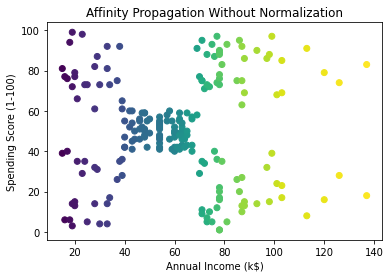

In [4]:
feature_names = ['Annual Income (k$)', 'Spending Score (1-100)']
clustering = AP.fit(df_mall_customers[feature_names])
plt.scatter(df_mall_customers['Annual Income (k$)'], df_mall_customers['Spending Score (1-100)'], c=clustering.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Affinity Propagation Without Normalization')
plt.show()

In [5]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
features = min_max_scaler.fit_transform(df_mall_customers[feature_names].values)
features_df = pd.DataFrame(features)
features_df.columns = feature_names
features_df.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


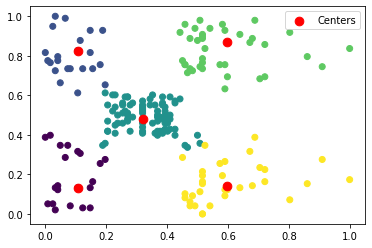

In [6]:
clustering = AP.fit(features_df)
plt.scatter(features_df['Annual Income (k$)'].values, features_df['Spending Score (1-100)'].values, c=clustering.labels_)
plt.scatter(AP.cluster_centers_[:,0], AP.cluster_centers_[:,1], s=75, c='red', label='Centers')
plt.legend()
plt.show()

In [8]:
print(AP.cluster_centers_)

[[0.10655738 0.13265306]
 [0.10655738 0.82653061]
 [0.31967213 0.47959184]
 [0.59836066 0.86734694]
 [0.59836066 0.14285714]]
